In [1]:
# Importing libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data

dataset= load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleaning data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA= df[df['job_title_short']== 'Data Analyst'].copy()


In [6]:
df_DA['job_posted_month_num'] = df_DA['job_posted_date'].dt.month 


In [33]:
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot= df_DA_explode.pivot_table(index='job_posted_month_num', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total']= df_DA_pivot.sum()
df_DA_pivot= df_DA_pivot [df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot= df_DA_pivot.drop('Total')
df_DA_pivot 




job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,azure,oracle,aws,sql server,go,flow,vba,looker,snowflake,qlik,java,spark,jira,spss,javascript,alteryx,hadoop,sharepoint,outlook,bigquery,dax,gcp,mysql,databricks,sheets,ssis,c,git,pandas,ssrs,...,firestore,mlr,colocation,svelte,heroku,nuix,ionic,react.js,asp.net core,hugging face,objective-c,play framework,clojure,pascal,microsoft lists,debian,sqlserver,theano,qt,lisp,codecommit,blazor,f#,kali,couchdb,next.js,haskell,shogun,pulumi,mattermost,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,1288,1304,1077,1130,1002,954,839,695,597,682,691,626,639,631,578,551,607,499,502,443,408,396,377,341,389,430,389,363,301,386,...,4,1,3,0,2,0,1,1,1,0,0,3,0,0,0,1,2,0,0,1,1,0,1,0,0,0,0,3,0,0,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,987,942,761,739,680,683,625,522,542,575,426,398,417,374,390,448,377,354,360,290,270,275,286,244,232,314,255,208,186,275,...,0,1,0,1,0,0,1,1,0,0,0,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,887,820,705,654,651,573,595,530,506,479,411,407,413,405,408,442,387,405,375,300,269,255,319,177,192,255,262,216,223,214,...,0,1,1,0,2,0,1,3,0,1,1,2,1,1,1,2,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,832,868,720,686,669,584,617,473,543,497,449,421,375,397,348,413,369,360,345,270,251,292,275,234,240,259,231,220,212,229,...,0,1,0,2,2,0,2,2,1,0,0,2,3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,727,746,603,603,616,478,497,409,421,459,380,341,323,308,296,310,314,294,275,229,226,254,249,190,241,223,214,217,195,194,...,2,0,2,2,3,1,0,0,0,0,3,0,1,0,1,2,0,0,1,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,915,824,770,581,675,622,624,526,549,513,386,381,394,372,360,393,331,333,355,289,256,282,265,258,283,265,222,249,295,225,...,1,2,3,1,0,0,0,2,0,1,1,0,0,0,0,0,3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,949,909,778,692,655,634,574,526,527,455,442,413,367,362,388,366,324,310,329,256,285,293,270,279,288,230,239,254,279,230,...,0,1,0,2,0,0,0,1,0,3,2,0,0,2,0,0,1,0,1,1,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,1035,990,924,868,713,710,670,554,596,483,475,501,496,439,474,413,358,405,387,315,332,294,267,351,320,292,334,291,285,281,...,3,2,0,0,1,0,0,2,3,1,0,1,3,0,1,1,1,0,1,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,821,738,717,600,541,531,471,505,473,396,336,372,370,371,362,317,318,294,320,234,296,251,241,259,242,190,206,210,231,181,...,1,0,0,0,0,3,0,0,0,0,2,0,0,2,2,0,0,2,0,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [34]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_num'].apply(lambda x: pd.to_datetime(x, format= '%m').strftime('%b'))
df_DA_pivot= df_DA_pivot.set_index('job_posted_month')
df_DA_pivot= df_DA_pivot.drop(columns='job_posted_month_num')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,azure,oracle,aws,sql server,go,flow,vba,looker,snowflake,qlik,java,spark,jira,spss,javascript,alteryx,hadoop,sharepoint,outlook,bigquery,dax,gcp,mysql,databricks,sheets,ssis,c,git,pandas,ssrs,...,firestore,mlr,colocation,svelte,heroku,nuix,ionic,react.js,asp.net core,hugging face,objective-c,play framework,clojure,pascal,microsoft lists,debian,sqlserver,theano,qt,lisp,codecommit,blazor,f#,kali,couchdb,next.js,haskell,shogun,pulumi,mattermost,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,1288,1304,1077,1130,1002,954,839,695,597,682,691,626,639,631,578,551,607,499,502,443,408,396,377,341,389,430,389,363,301,386,...,4,1,3,0,2,0,1,1,1,0,0,3,0,0,0,1,2,0,0,1,1,0,1,0,0,0,0,3,0,0,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,987,942,761,739,680,683,625,522,542,575,426,398,417,374,390,448,377,354,360,290,270,275,286,244,232,314,255,208,186,275,...,0,1,0,1,0,0,1,1,0,0,0,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,887,820,705,654,651,573,595,530,506,479,411,407,413,405,408,442,387,405,375,300,269,255,319,177,192,255,262,216,223,214,...,0,1,1,0,2,0,1,3,0,1,1,2,1,1,1,2,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,832,868,720,686,669,584,617,473,543,497,449,421,375,397,348,413,369,360,345,270,251,292,275,234,240,259,231,220,212,229,...,0,1,0,2,2,0,2,2,1,0,0,2,3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,727,746,603,603,616,478,497,409,421,459,380,341,323,308,296,310,314,294,275,229,226,254,249,190,241,223,214,217,195,194,...,2,0,2,2,3,1,0,0,0,0,3,0,1,0,1,2,0,0,1,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,915,824,770,581,675,622,624,526,549,513,386,381,394,372,360,393,331,333,355,289,256,282,265,258,283,265,222,249,295,225,...,1,2,3,1,0,0,0,2,0,1,1,0,0,0,0,0,3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,949,909,778,692,655,634,574,526,527,455,442,413,367,362,388,366,324,310,329,256,285,293,270,279,288,230,239,254,279,230,...,0,1,0,2,0,0,0,1,0,3,2,0,0,2,0,0,1,0,1,1,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,1035,990,924,868,713,710,670,554,596,483,475,501,496,439,474,413,358,405,387,315,332,294,267,351,320,292,334,291,285,281,...,3,2,0,0,1,0,0,2,3,1,0,1,3,0,1,1,1,0,1,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,821,738,717,600,541,531,471,505,473,396,336,372,370,371,362,317,318,294,320,234,296,251,241,259,242,190,206,210,231,181,...,1,0,0,0,0,3,0,0,0,0,2,0,0,2,2,0,0,2,0,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


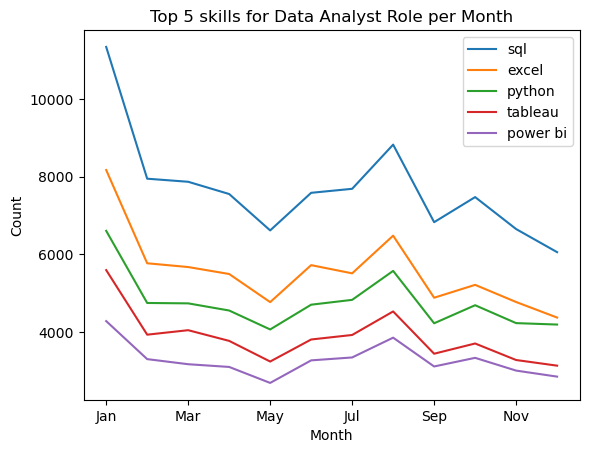

In [35]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title("Top 5 skills for Data Analyst Role per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.show()
